In [518]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy
import warnings; warnings.simplefilter('ignore')
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

students = pd.read_csv('stud_math.csv.xls')

In [519]:
#Functions:

#анализ номинативных колонок. Показывает количество значений всех вариантов и 
#при нахождении пропусков, заполняет поля на наиболее часто встречаемое значение.
def column_obj(column):
        all_indexes = list(students[column].value_counts().index)
        print(students[column].value_counts())
        print('Уникальных значений:', students[column].nunique())
        print('Пропущеных значений в столбце, замененых на наибольшее значение:',
              students[column].isnull().sum(axis=0))
        students.loc[(students[column].isnull()), column] = students[column].value_counts().index[0]
        sns.countplot(students[column])
        
#анализ числовых колонок. Показывает медиану и среднее значение
#при нахождении пропусков, заполняет поля на медианное значение.
def column_int(column):
        fig, ax = plt.subplots()
        students[column].hist(ax=ax)
        students[column].describe()
        ax.set_xlabel(column)
        plt.show
        print('Медиана: ', students[column].median())
        print("Среднее: ", students[column].mean())
        print('Пропущеных значений в столбце, замененых на значение median:',
              students[column].isnull().sum(axis=0))
        students.loc[(students[column].isnull()), column] = students[column].median()

#распределение признака для номинативных переменных
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x='score', y=column, 
                data=students.loc[students.loc[:, column].isin(students.loc[:, column].value_counts().index[:])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()           
        
#теста Стьюдента
def get_stat_dif(column):
    cols = students.loc[:, column].value_counts().index[:]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(students.loc[students.loc[:, column] == comb[0], 'score'], 
                        students.loc[students.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [520]:
display(students.head(10))


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


In [521]:
students.drop(['studytime, granular'], inplace = True, axis = 1)
#Удаляем ненужный столбец из базы

In [522]:
students.columns = ('school','sex','age','address','famsize','pstatus','medu','fedu','mjob','fjob','reason','guardian','traveltime','studytime','failures','schoolsup','famsup','paid','activities','nursery', 'higher','internet','romantic','famrel','freetime','goout','health','absences','score')
#переименуем столбцы для удобства

In [523]:
students.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      395 non-null    object 
 1   sex         395 non-null    object 
 2   age         395 non-null    int64  
 3   address     378 non-null    object 
 4   famsize     368 non-null    object 
 5   pstatus     350 non-null    object 
 6   medu        392 non-null    float64
 7   fedu        371 non-null    float64
 8   mjob        376 non-null    object 
 9   fjob        359 non-null    object 
 10  reason      378 non-null    object 
 11  guardian    364 non-null    object 
 12  traveltime  367 non-null    float64
 13  studytime   388 non-null    float64
 14  failures    373 non-null    float64
 15  schoolsup   386 non-null    object 
 16  famsup      356 non-null    object 
 17  paid        355 non-null    object 
 18  activities  381 non-null    object 
 19  nursery     379 non-null    o

In [524]:
#Мы имеем 12 числовых столбцов и 17 номинативных
#Начинаем анализ числовых столбцов

Медиана:  17.0
Среднее:  16.696202531645568
Пропущеных значений в столбце, замененых на значение median: 0


,age
16.0,104
17.0,98
15.0,82
18.0,82
19.0,24
20.0,3
21.0,1
22.0,1


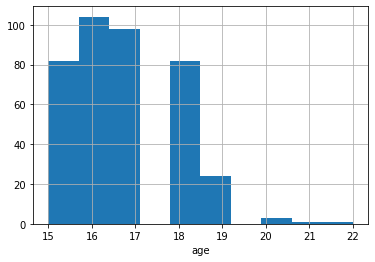

In [525]:
#возраст учеников
column_int('age')
pd.DataFrame(students.age.value_counts())

In [526]:
#с помощью выполненных команд видно,что возраст учеников сконцентрирован с 15 до 19 лет и имеет выбросы 20,21 и 22 года
#поскольку выбросы занимают чуть больше 1% они не имеют значимость для выборки, убираем их.

In [527]:
students = students.loc[students.age <= 19]

Медиана:  3.0
Среднее:  2.751937984496124
Пропущеных значений в столбце, замененых на значение median: 3


,medu
4.0,130
2.0,101
3.0,98
1.0,58
0.0,3


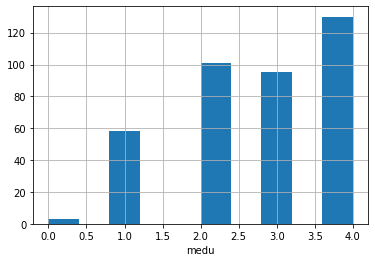

In [528]:
#Образование матерей
column_int('medu')
pd.DataFrame(students.medu.value_counts())

In [529]:
#выборка содержит распределение образования матерей в пяти категориях. Больше всего значений 4, что означает, 
#что бОльшая часть матерей имеет высшее образование. Выбросов нет. Пропуски заменены на значение 4.0

Медиана:  3.0
Среднее:  2.628415300546448
Пропущеных значений в столбце, замененых на значение median: 24


,fedu
3.0,120
2.0,103
4.0,88
1.0,76
0.0,2
40.0,1


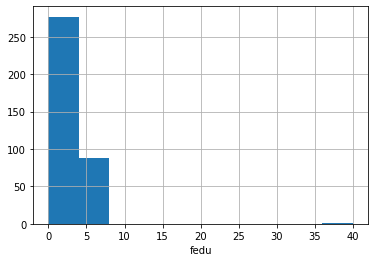

In [530]:
#Образование отца
column_int('fedu')
pd.DataFrame(students.fedu.value_counts())

In [531]:
#выборка содержит один выброс, его заменяем на медиану, чтобы сохранить целостность выборки

In [532]:
students.fedu = students.fedu.astype(float).apply(lambda x: students.fedu.median() if x == students.fedu.max() else x)
pd.DataFrame(students.fedu.value_counts())

,fedu
3.0,121
2.0,103
4.0,88
1.0,76
0.0,2


In [533]:
##выборка содержит распределение образования отцов в пяти категориях. Больше всего значений 3, что означает, 
#что бОльшая часть отцов имеет высшее образование. Выбросов нет. Пропуски заменены на значение 3.0

Медиана:  1.0
Среднее:  1.441988950276243
Пропущеных значений в столбце, замененых на значение median: 28


,traveltime
1.0,266
2.0,95
3.0,22
4.0,7


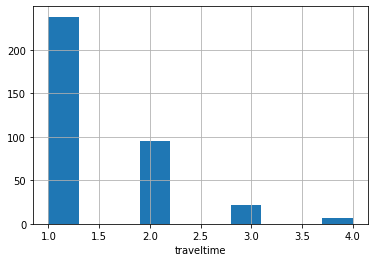

In [534]:
#Время до школы
column_int('traveltime')
pd.DataFrame(students.traveltime.value_counts())

In [535]:
#Большее количество учеников добираются до школы до 15 минут. Выбросов нет. Пропуски заменены на значение 1.0

Медиана:  2.0
Среднее:  2.044386422976501
Пропущеных значений в столбце, замененых на значение median: 7


,studytime
2.0,200
1.0,100
3.0,63
4.0,27


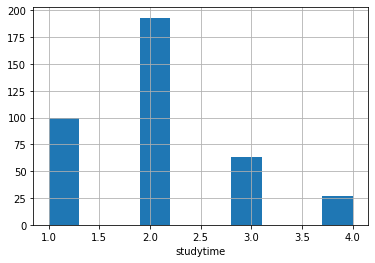

In [536]:
#Внеурочное обучение
column_int('studytime')
pd.DataFrame(students.studytime.value_counts())

In [537]:
#Внешкольное образование у бОльшей части учеников составляет 2-5 часов в неделю. Выбросов нет. Пропуски заменены на значение 2.0

Медиана:  0.0
Среднее:  0.31521739130434784
Пропущеных значений в столбце, замененых на значение median: 22


,failures
0.0,314
1.0,49
2.0,14
3.0,13


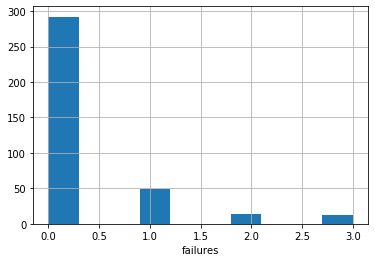

In [538]:
#failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)
column_int('failures')
pd.DataFrame(students.failures.value_counts())

In [539]:
#Большинство учеников без внеучебных неудач. Выбросов нет. Пропуски заполнены.

Медиана:  4.0
Среднее:  3.922865013774105
Пропущеных значений в столбце, замененых на значение median: 27


,famrel
4.0,209
5.0,94
3.0,62
2.0,17
1.0,7
-1.0,1


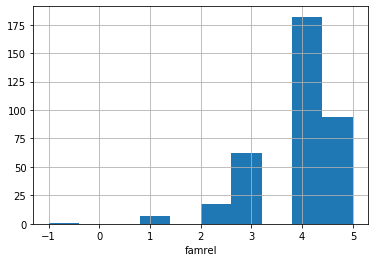

In [540]:
#famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)
column_int('famrel')
pd.DataFrame(students.famrel.value_counts())

In [541]:
#Есть выброс (-1). 
#Устраним с помощью замены на медианное значение.
students.famrel = students.famrel.astype(float).apply(lambda x: students.famrel.median() if x < 0 else x)
pd.DataFrame(students.famrel.value_counts())

,famrel
4.0,210
5.0,94
3.0,62
2.0,17
1.0,7


In [542]:
#Большинство учеников находятся в хороших семейных отношениях (4). выброс устранен. Пропуски заполнены.

Медиана:  3.0
Среднее:  3.213720316622691
Пропущеных значений в столбце, замененых на значение median: 11


,freetime
3.0,164
4.0,110
2.0,63
5.0,35
1.0,18


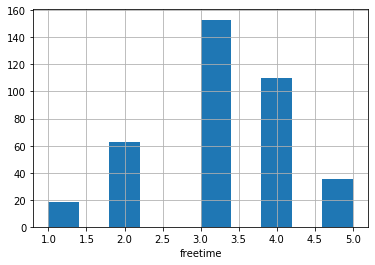

In [543]:
#freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)
column_int('freetime')
pd.DataFrame(students.freetime.value_counts())

In [544]:
#Большинсво учеников имеют среднее количество свободного времени. Выбросов нет. Пропуски заполнены.

Медиана:  3.0
Среднее:  3.099476439790576
Пропущеных значений в столбце, замененых на значение median: 8


,goout
3.0,132
2.0,101
4.0,83
5.0,51
1.0,23


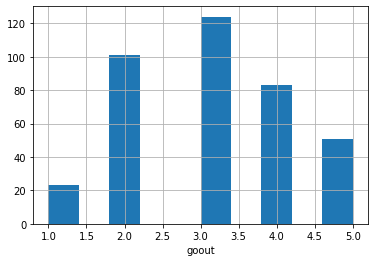

In [545]:
#goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)
column_int('goout')
pd.DataFrame(students.goout.value_counts())

In [546]:
#Большинсво учеников имеют среднее количество проведенного времени с друзьями. Выбросов нет. Пропуски заполнены.

Медиана:  4.0
Среднее:  3.536
Пропущеных значений в столбце, замененых на значение median: 15


,health
5.0,137
3.0,87
4.0,77
1.0,46
2.0,43


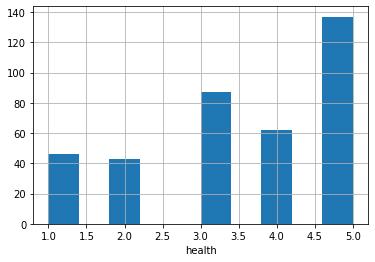

In [547]:
#health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)
column_int('health')
pd.DataFrame(students.health.value_counts())

In [548]:
#Большинство учеников имеют отличное здоровье. Выбросов нет. Пропуски заполнены.

Медиана:  4.0
Среднее:  6.753968253968254
Пропущеных значений в столбце, замененых на значение median: 12


,absences
0.0,110
4.0,64
2.0,60
6.0,31
8.0,21
10.0,17
14.0,12
12.0,12
3.0,7
7.0,6


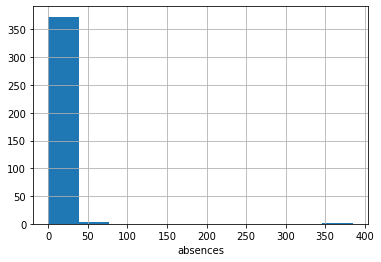

In [549]:
#absences — количество пропущенных занятий
column_int('absences')
pd.DataFrame(students.absences.value_counts())

In [550]:
#Есть выброс 385, который стоит устранить, т.к. он явно выбивается из общей картины.
students.absences = students.absences.astype(float).apply(lambda x: students.absences.median() if x == 385 else x)

In [551]:
#Выбросов устранены. Пропуски заполнены.

Медиана:  55.0
Среднее:  52.200520833333336
Пропущеных значений в столбце, замененых на значение median: 6


,score
50.0,54
55.0,52
0.0,37
75.0,32
65.0,31
60.0,31
40.0,30
70.0,27
45.0,26
80.0,16


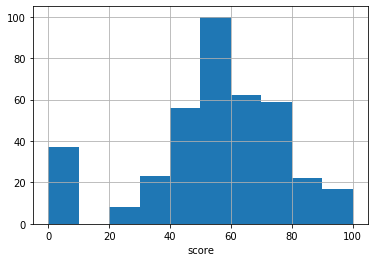

In [552]:
#score — баллы по госэкзамену по математике
column_int('score')
pd.DataFrame(students.score.value_counts())

In [553]:
#Большинство учеников сдали экзамен на 50 баллов. Выбросов нет. Есть большая группа учеников (37 человек) 
#сдавших экзамен на 0 баллов, слишком большее количество чтобы быть погрешностью или выбросом. Все показатели оставляем 
#для анализа, т.к. необходимо выяснить закономерность возникновения такого рещультата.


In [554]:
students

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18.0,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17.0,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15.0,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15.0,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16.0,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,MS,F,18.0,U,LE3,T,3.0,1.0,teacher,services,course,mother,1.0,2.0,0.0,no,yes,yes,no,yes,yes,yes,no,4.0,3.0,4.0,1.0,0.0,40.0
389,MS,F,18.0,U,GT3,T,1.0,1.0,other,other,course,mother,1.0,2.0,1.0,no,no,no,yes,yes,yes,NaN,no,1.0,1.0,1.0,5.0,0.0,0.0
391,MS,M,17.0,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
393,MS,M,18.0,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,NaN,no,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


In [555]:
#Смотрим корреляцию числовых столбцов
students.corr()

,age,medu,fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
age,1.000000,-0.166092,-0.129784,0.105663,0.010311,0.145037,0.014640,-0.029345,0.120787,-0.050804,0.168651,-0.166054
medu,-0.166092,1.000000,0.612809,-0.167625,0.070938,-0.248374,-0.018251,0.033637,0.064404,-0.051043,0.096677,0.200723
fedu,-0.129784,0.612809,1.000000,-0.153386,0.004488,-0.239661,-0.020403,0.002322,0.052335,0.015596,0.041317,0.121418
traveltime,0.105663,-0.167625,-0.153386,1.000000,-0.104060,0.062048,-0.020108,-0.004776,0.055990,-0.045717,0.001529,-0.057900
studytime,0.010311,0.070938,0.004488,-0.104060,1.000000,-0.160175,0.036001,-0.109468,-0.046425,-0.077357,-0.065254,0.114106
failures,0.145037,-0.248374,-0.239661,0.062048,-0.160175,1.000000,-0.035255,0.060545,0.099376,0.104581,0.056025,-0.335259
famrel,0.014640,-0.018251,-0.020403,-0.020108,0.036001,-0.035255,1.000000,0.138075,0.060298,0.102187,-0.032373,0.047014
freetime,-0.029345,0.033637,0.002322,-0.004776,-0.109468,0.060545,0.138075,1.000000,0.291592,0.061892,-0.069591,0.014895
goout,0.120787,0.064404,0.052335,0.055990,-0.046425,0.099376,0.060298,0.291592,1.000000,-0.006851,0.027870,-0.123565
health,-0.050804,-0.051043,0.015596,-0.045717,-0.077357,0.104581,0.102187,0.061892,-0.006851,1.000000,-0.016098,-0.080246


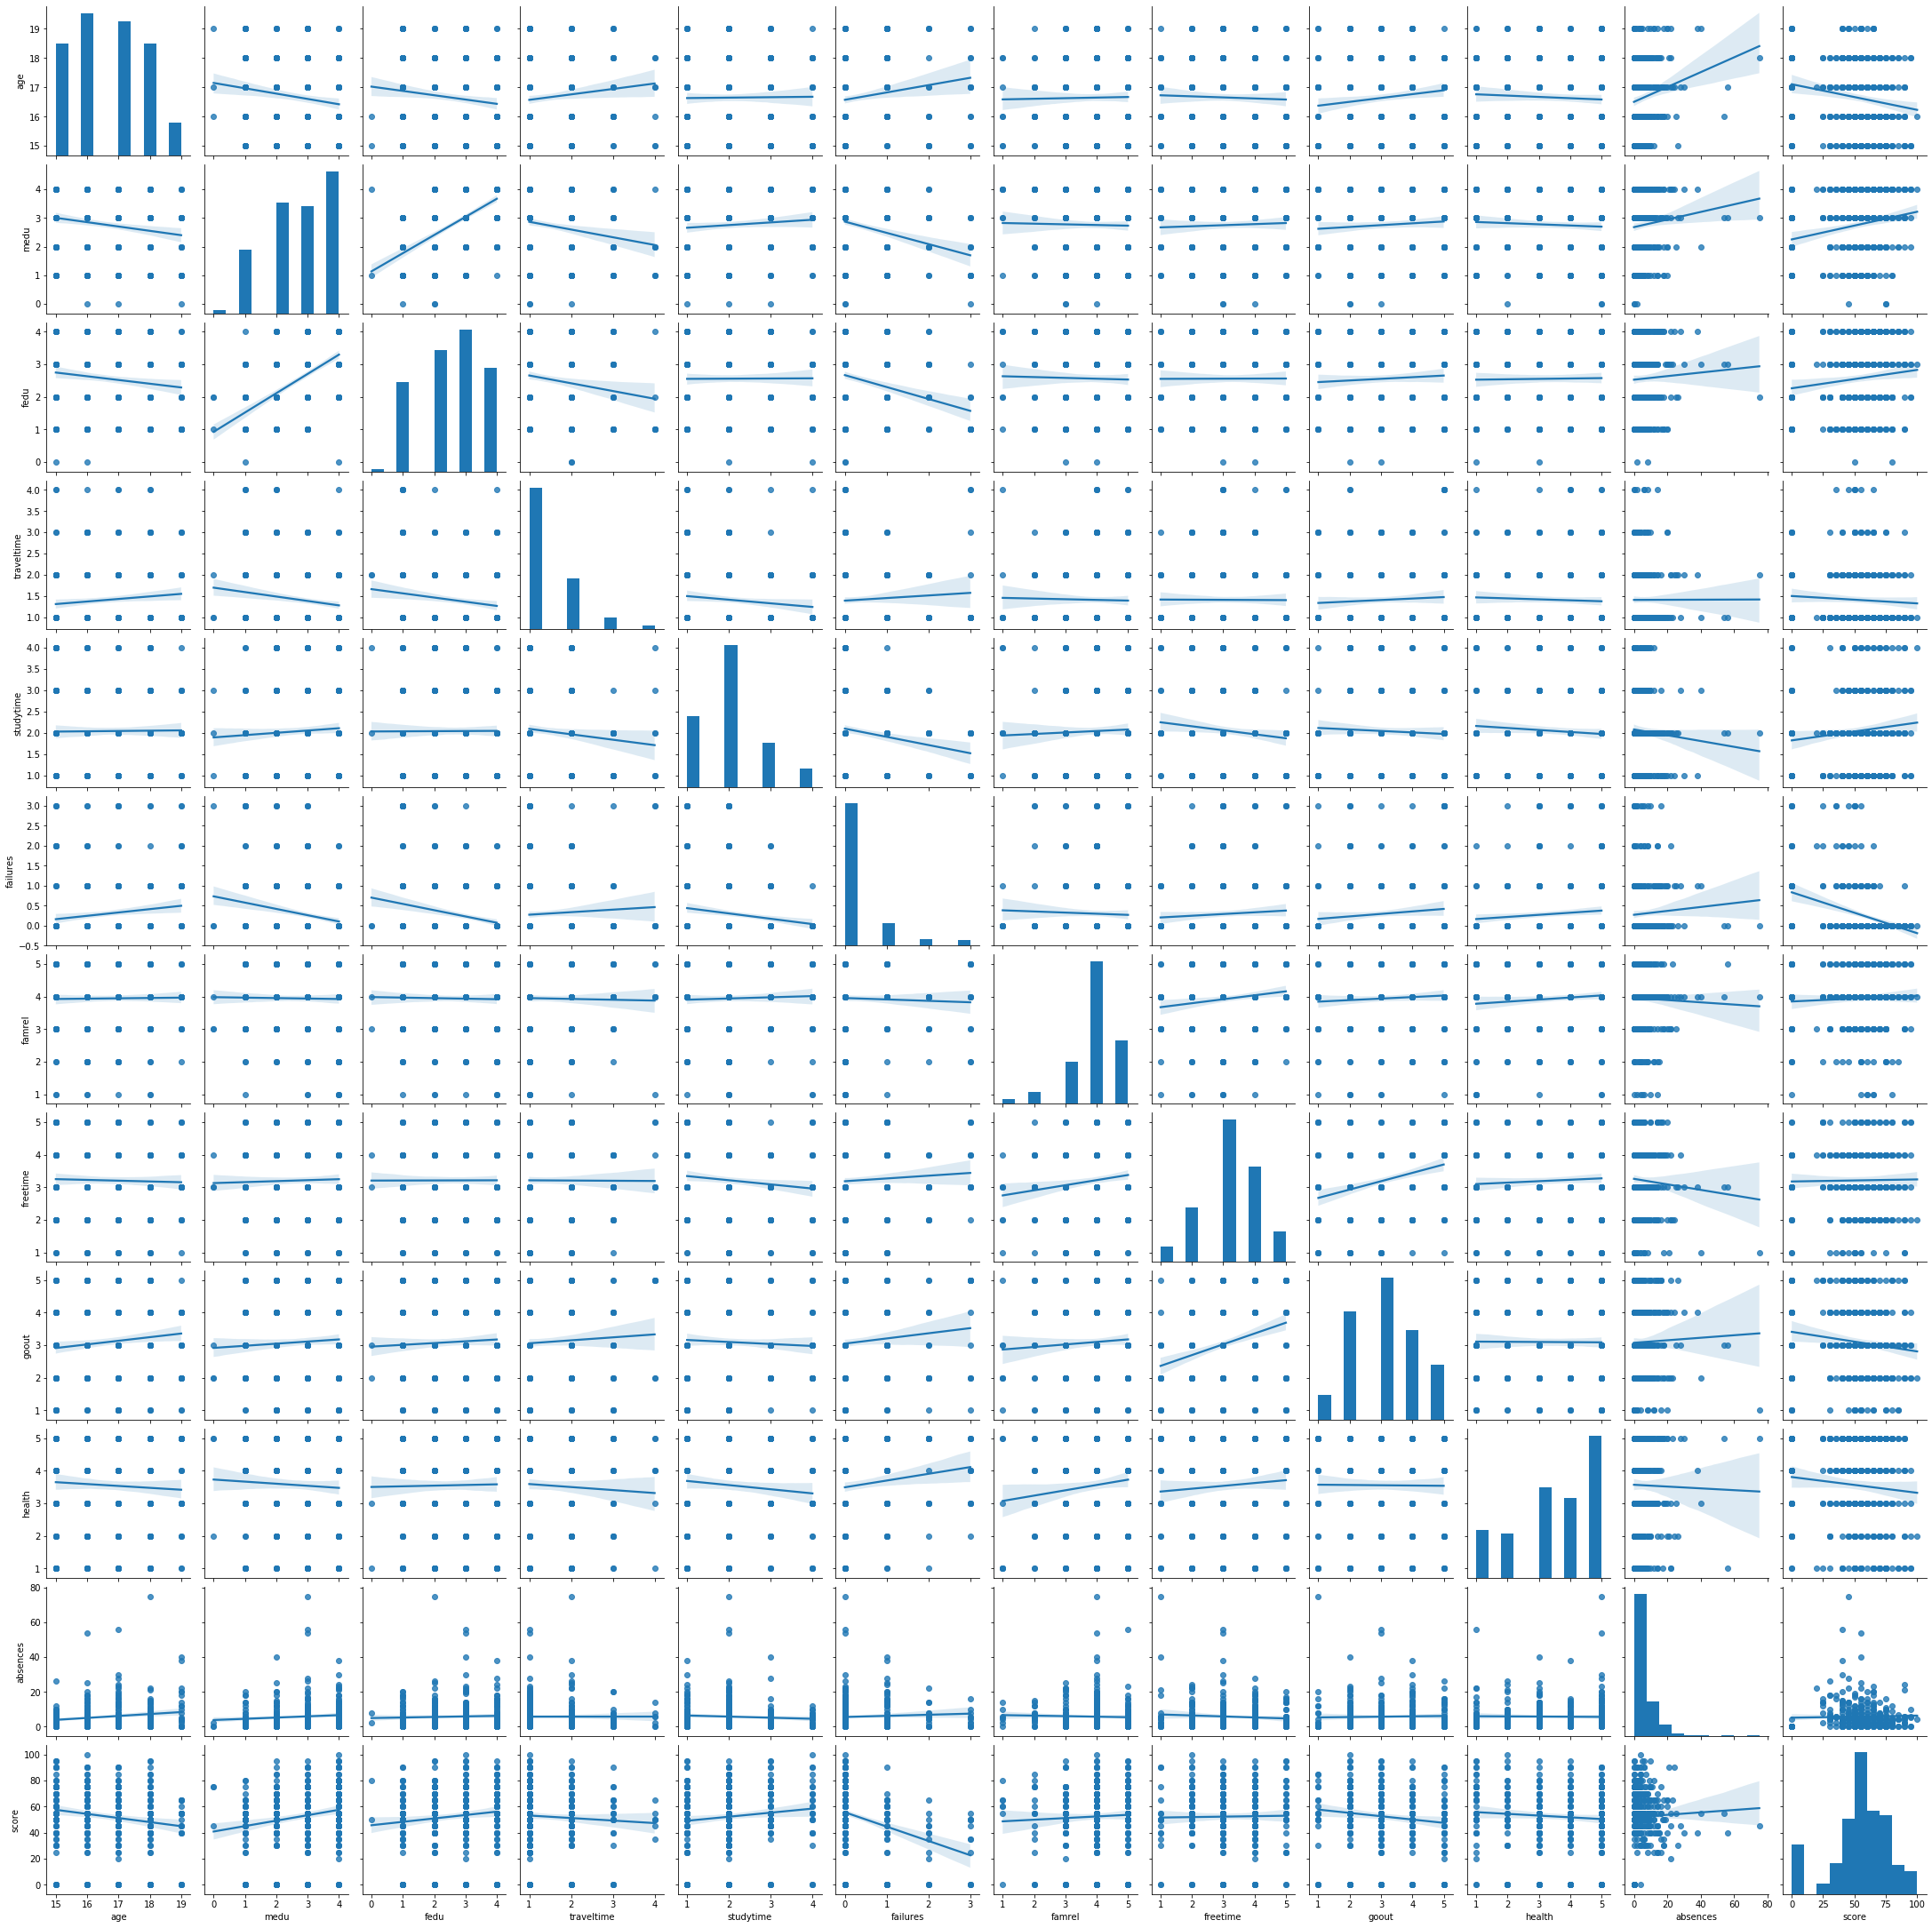

In [485]:
sns.pairplot(students, kind = 'reg')

In [556]:
#Судя по представленным графикам и коэффицентам кореляции:
#Отрицательно коррелируют со значением score столбцы: age, traveltime, failures, goout, health
#Положительная корреляция у столбцов: medu, fedu, studytime, famrel, freetime, absences
#Причем явно выражена слабая корреляция (менее 0,1) у столбцов traveltime, famrel, freetime, health, absences

#Учитывая эти наблюдения для дальнейшего пострения модели нам понадобятся только medu, fedu, studytime

In [557]:
#Начинаем изучение номинативных переменных

F    207
M    183
Name: sex, dtype: int64
Уникальных значений: 2
Пропущеных значений в столбце, замененых на наибольшее значение: 0


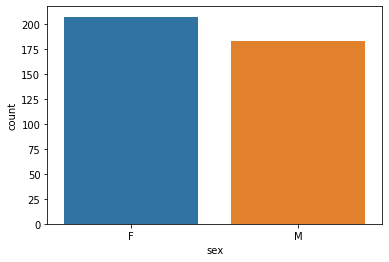

In [558]:
#sex — пол ученика ('F' - женский, 'M' - мужской)
column_obj('sex')

In [559]:
#пропусков нет. 

U    292
R     82
Name: address, dtype: int64
Уникальных значений: 2
Пропущеных значений в столбце, замененых на наибольшее значение: 16


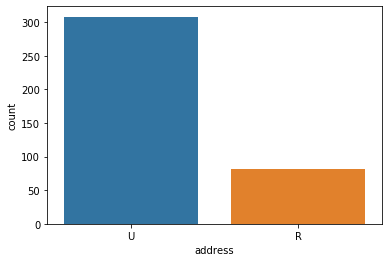

In [560]:
#address — тип адреса ученика ('U' - городской, 'R' - за городом)
column_obj('address')

In [561]:
#пропуски заменены на наиболее часто встречаемое значение.

GT3    257
LE3    106
Name: famsize, dtype: int64
Уникальных значений: 2
Пропущеных значений в столбце, замененых на наибольшее значение: 27


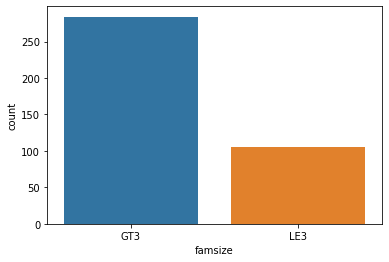

In [562]:
#famsize — размер семьи('LE3' <= 3, 'GT3' >3)
column_obj('famsize')

In [563]:
#пропуски заменены на наиболее часто встречаемое значение.

T    311
A     34
Name: pstatus, dtype: int64
Уникальных значений: 2
Пропущеных значений в столбце, замененых на наибольшее значение: 45


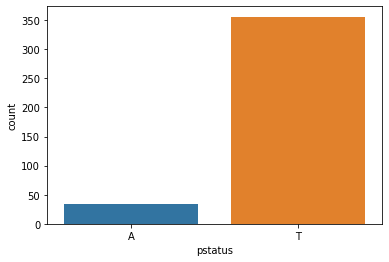

In [564]:
#Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)
column_obj('pstatus')

In [565]:
#пропуски заменены на наиболее часто встречаемое значение.

other       132
services     95
at_home      58
teacher      55
health       31
Name: mjob, dtype: int64
Уникальных значений: 5
Пропущеных значений в столбце, замененых на наибольшее значение: 19


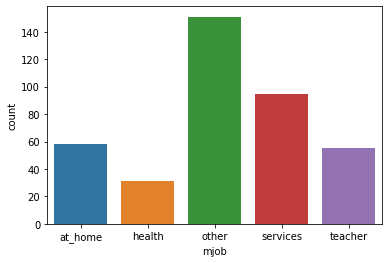

In [566]:
#Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
column_obj('mjob')

In [567]:
#пропуски заменены на наиболее часто встречаемое значение.

other       194
services    100
teacher      29
at_home      16
health       15
Name: fjob, dtype: int64
Уникальных значений: 5
Пропущеных значений в столбце, замененых на наибольшее значение: 36


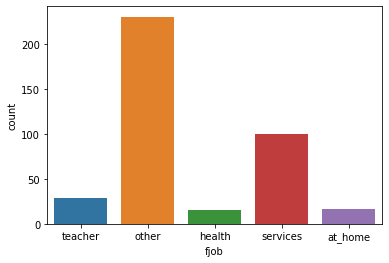

In [568]:
#Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
column_obj('fjob')

In [569]:
#пропуски заменены на наиболее часто встречаемое значение.

course        133
home          104
reputation    103
other          33
Name: reason, dtype: int64
Уникальных значений: 4
Пропущеных значений в столбце, замененых на наибольшее значение: 17


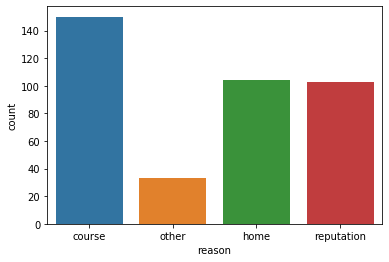

In [570]:
#reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)
column_obj('reason')

In [571]:
#пропуски заменены на наиболее часто встречаемое значение.

mother    249
father     86
other      27
Name: guardian, dtype: int64
Уникальных значений: 3
Пропущеных значений в столбце, замененых на наибольшее значение: 28


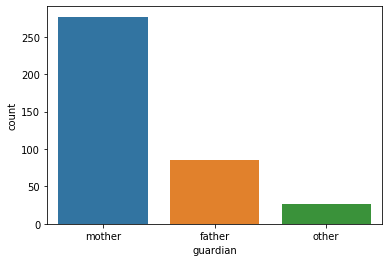

In [572]:
#guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)
column_obj('guardian')

In [573]:
#пропуски заменены на наиболее часто встречаемое значение.

no     331
yes     51
Name: schoolsup, dtype: int64
Уникальных значений: 2
Пропущеных значений в столбце, замененых на наибольшее значение: 8


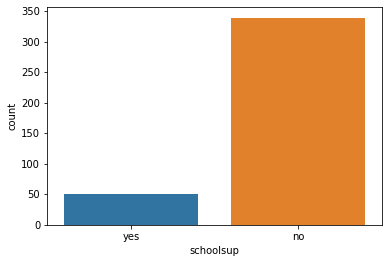

In [574]:
#schoolsup — дополнительная образовательная поддержка (yes или no)
column_obj('schoolsup')

In [575]:
#пропуски заменены на наиболее часто встречаемое значение.

yes    217
no     134
Name: famsup, dtype: int64
Уникальных значений: 2
Пропущеных значений в столбце, замененых на наибольшее значение: 39


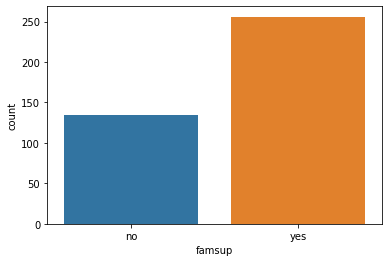

In [576]:
#famsup — семейная образовательная поддержка (yes или no)
column_obj('famsup')

In [577]:
#пропуски заменены на наиболее часто встречаемое значение.

no     197
yes    153
Name: paid, dtype: int64
Уникальных значений: 2
Пропущеных значений в столбце, замененых на наибольшее значение: 40


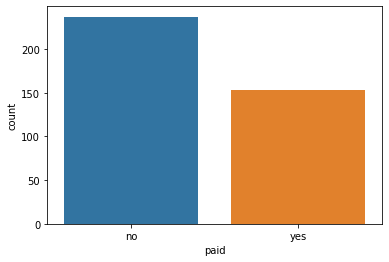

In [578]:
#paid — дополнительные платные занятия по математике (yes или no)
column_obj('paid')

In [579]:
#пропуски заменены на наиболее часто встречаемое значение.

yes    194
no     182
Name: activities, dtype: int64
Уникальных значений: 2
Пропущеных значений в столбце, замененых на наибольшее значение: 14


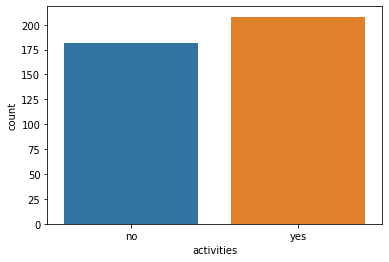

In [580]:
#activities — дополнительные внеучебные занятия (yes или no)
column_obj('activities')

In [581]:
#пропуски заменены на наиболее часто встречаемое значение.

yes    298
no      76
Name: nursery, dtype: int64
Уникальных значений: 2
Пропущеных значений в столбце, замененых на наибольшее значение: 16


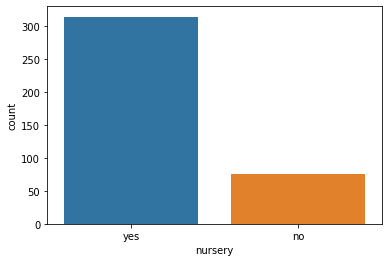

In [582]:
#nursery — посещал детский сад (yes или no)
column_obj('nursery')

In [583]:
#пропуски заменены на наиболее часто встречаемое значение.

yes    353
no      18
Name: higher, dtype: int64
Уникальных значений: 2
Пропущеных значений в столбце, замененых на наибольшее значение: 19


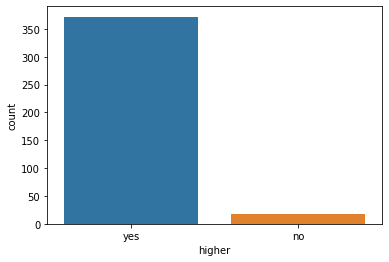

In [584]:
#higher — хочет получить высшее образование (yes или no)
column_obj('higher')

In [585]:
#пропуски заменены на наиболее часто встречаемое значение.

yes    303
no      53
Name: internet, dtype: int64
Уникальных значений: 2
Пропущеных значений в столбце, замененых на наибольшее значение: 34


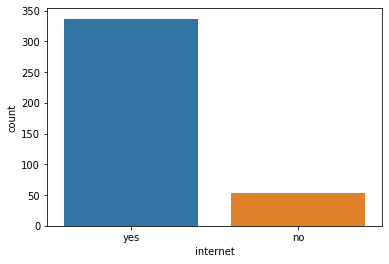

In [586]:
#internet — наличие интернета дома (yes или no)
column_obj('internet')

In [587]:
#пропуски заменены на наиболее часто встречаемое значение.

no     237
yes    122
Name: romantic, dtype: int64
Уникальных значений: 2
Пропущеных значений в столбце, замененых на наибольшее значение: 31


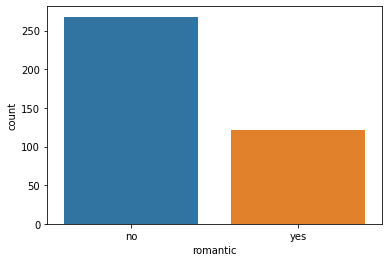

In [588]:
#romantic — в романтических отношениях (yes или no)
column_obj('romantic')

In [589]:
#пропуски заменены на наиболее часто встречаемое значение.

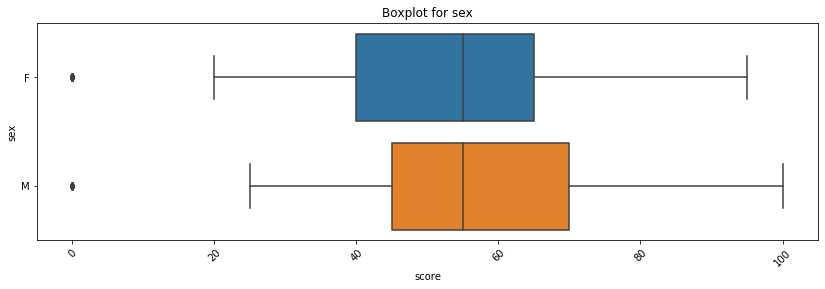

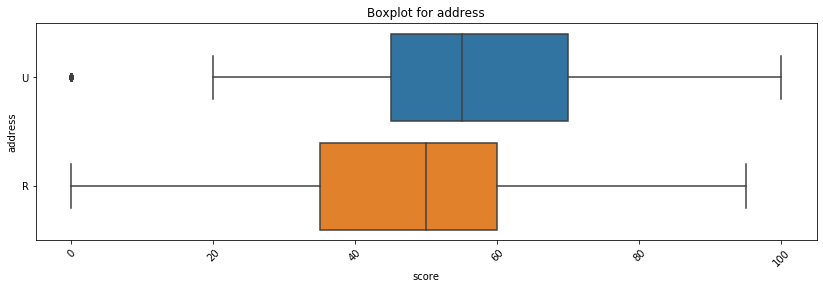

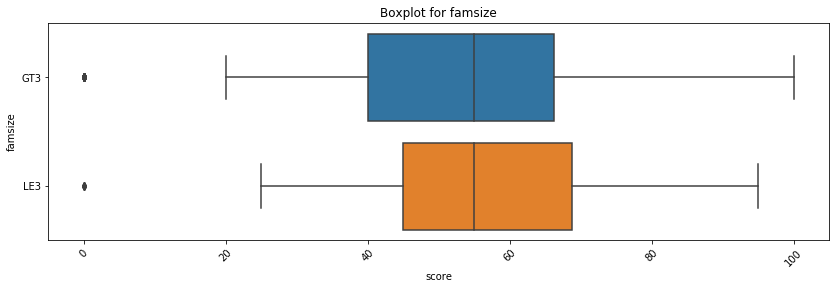

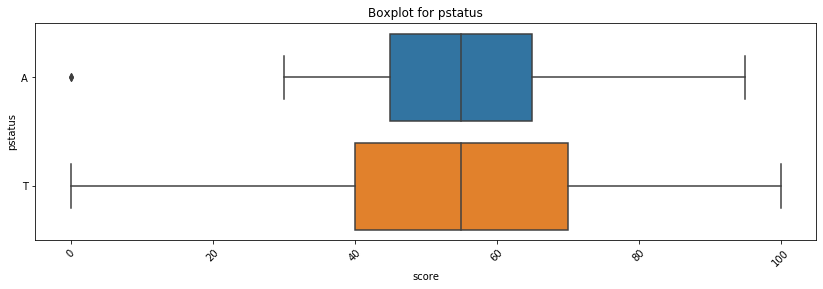

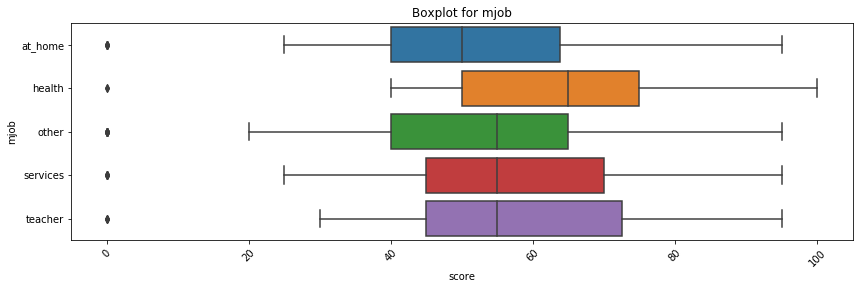

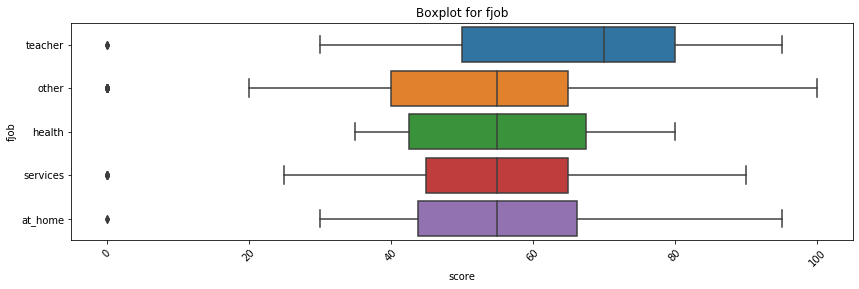

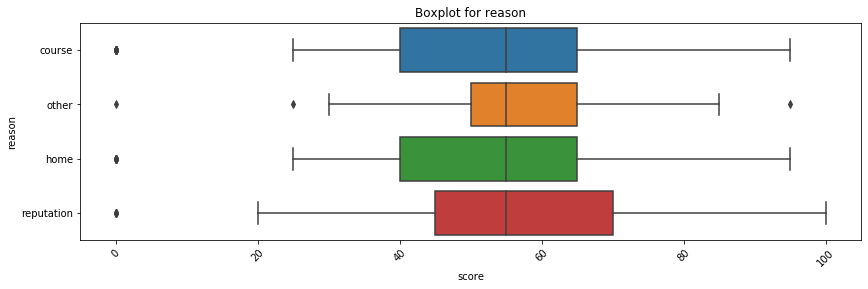

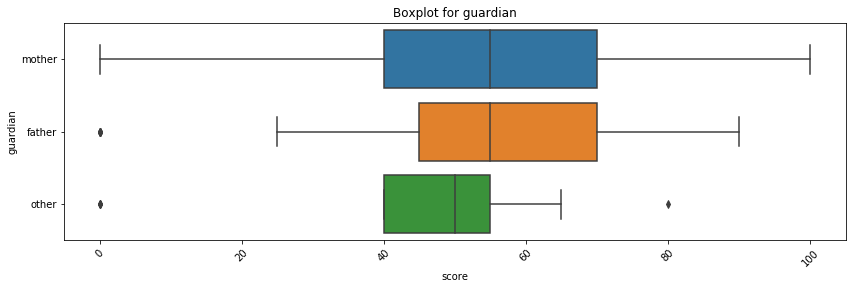

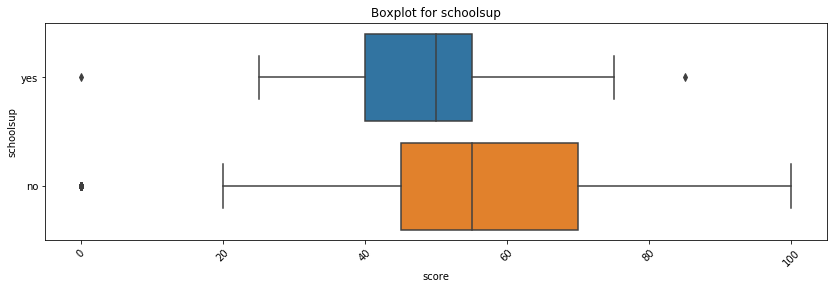

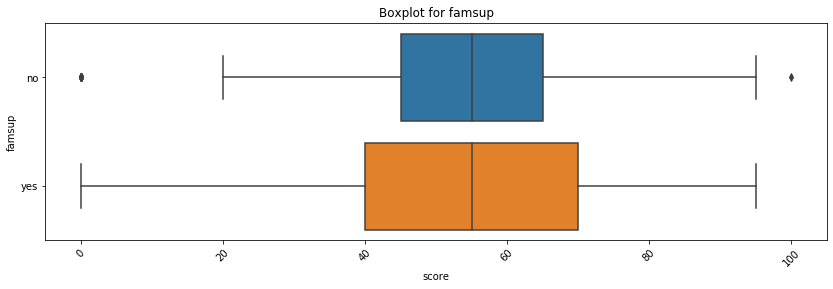

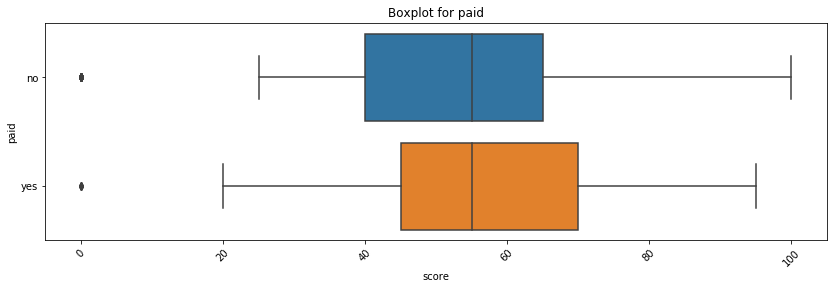

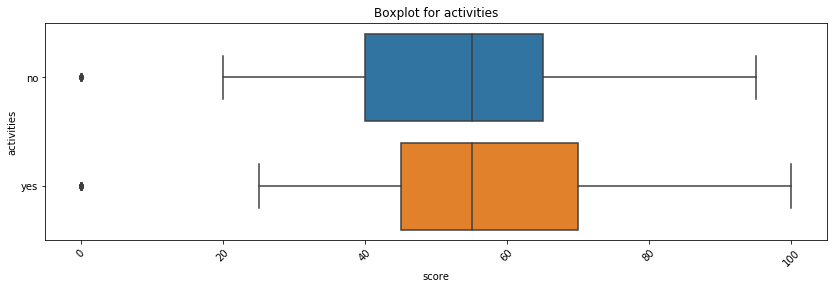

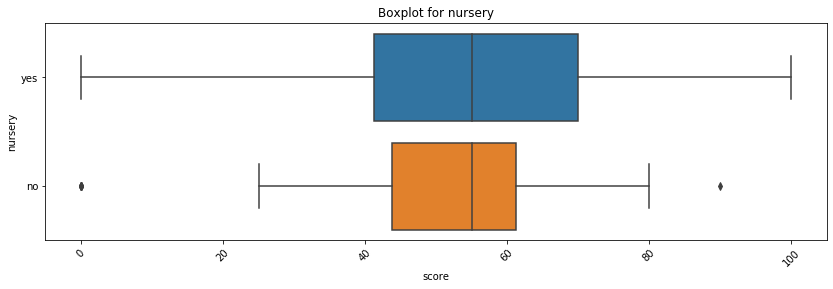

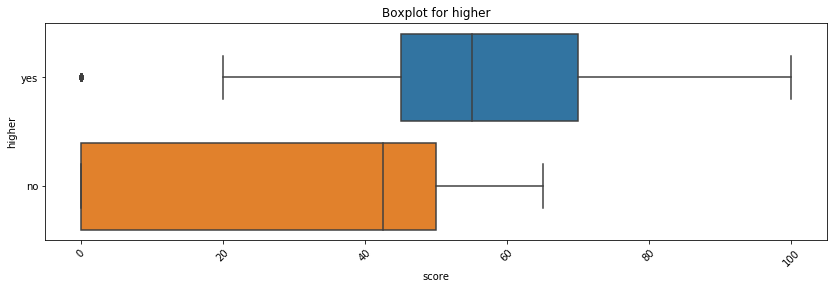

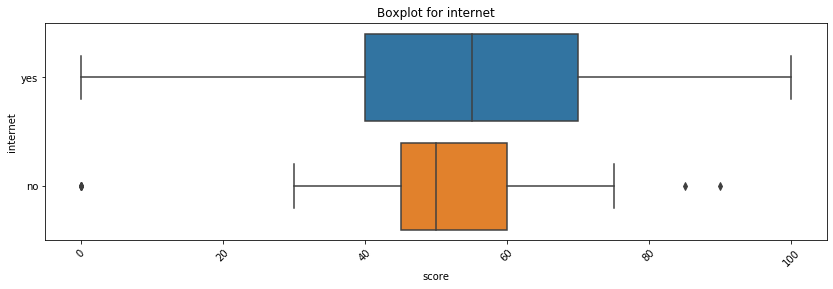

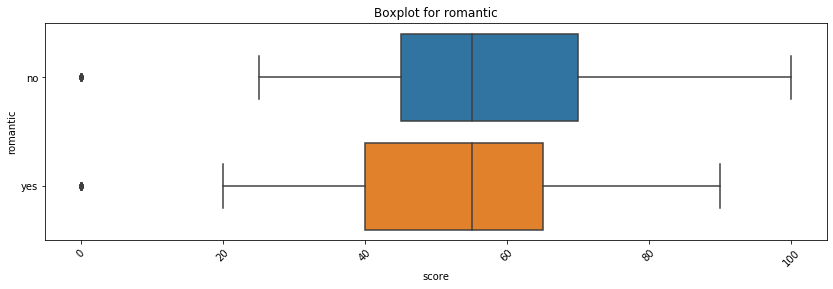

In [590]:
#рассмотрим распределение номинативных переменных в зависимости от значения score
for col in ['sex', 'address', 'famsize', 'pstatus', 'mjob', 'fjob', 'reason', 'guardian', 'schoolsup', 
            'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_boxplot(col)

In [591]:
#Проведем теста Стьюдента для полученных значений. Проверим нулевую гипотезу о том, что распределения оценок 
#по различным параметрам неразличимы

In [592]:
for col in ['sex', 'address', 'famsize', 'pstatus', 'mjob', 'fjob', 'reason', 'guardian', 'schoolsup', 
            'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic


In [593]:
#Серьезно отличаются три параметра: sex,  address, higher и  romantic. Оставим эти переменные в датасете для дальнейшего 
#построения модели. 

In [594]:
#Руководстувуясь логикой стоит предположить, что параметры schoolsup (дополнительная образовательная поддержка) 
#и internet (наличие интрнета) тоже должны влиять на результат обучения. Поэтому их оставляем для дальнейшей модели. 

In [595]:
#Итак, в нашем случае важные переменные, которые, возможно, оказывают влияние на оценку, 
#это: medu, fedu, studytime, sex,  address, higher и  romantic, schoolsup, internet.

In [596]:
stud_model = students.loc[:, ['medu', 'fedu', 'studytime', 'sex', 'address', 'higher', 'romantic', 'schoolsup', 'internet']]
stud_model.head()

,medu,fedu,studytime,sex,address,higher,romantic,schoolsup,internet
0,4.0,4.0,2.0,F,U,yes,no,yes,yes
1,1.0,1.0,2.0,F,U,yes,no,no,yes
2,1.0,1.0,2.0,F,U,yes,no,yes,yes
3,4.0,2.0,3.0,F,U,yes,yes,no,yes
4,3.0,3.0,2.0,F,U,yes,no,no,no


In [597]:
stud_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 390 entries, 0 to 394
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   medu       390 non-null    float64
 1   fedu       390 non-null    float64
 2   studytime  390 non-null    float64
 3   sex        390 non-null    object 
 4   address    390 non-null    object 
 5   higher     390 non-null    object 
 6   romantic   390 non-null    object 
 7   schoolsup  390 non-null    object 
 8   internet   390 non-null    object 
dtypes: float64(3), object(6)
memory usage: 40.5+ KB


In [598]:
#Выводы

In [599]:
#1. В данных есть пропущенные значения, но не более 10%.
#Все пропуски заменены на средние значенррия для числовых столбцов и наиболее часто встречаемыми для номинативных.

#2. Выбросы присутствовали в трех числовых столбцах и были устранены. Выборку можно считать достаточно чистой.

#3. Выявлены положительные корреляции у числовых столбцов medu, fedu, studytime. Поэтому делаем вывод, что они могут напрямую 
#влиять на итоговую оценку.

#4. Самые важные параметры, которые предлагается использовать в дальнейшем для построения модели, 
#это: medu, fedu, studytime, sex,  address, higher и  romantic, schoolsup, internet.
